In [ ]:
    # Pretende-se inverstir 12000 na implatação de uma mini-usina de energia solar.

    # a economia na tarifa de energia estimada é de 400

    # considere que a cada 6 meses e necessário fazer manutenção de 1500 

    # determine o VPL para um prazo de 5 anos 

    # Utilizar como referência a taxa de juros de 1% a.m 


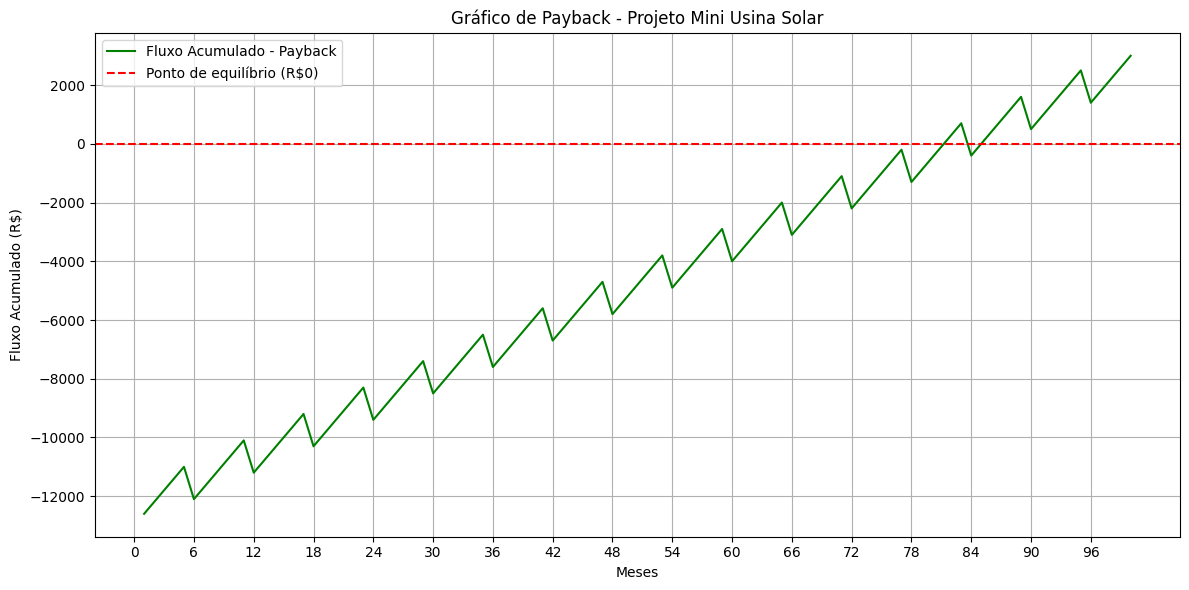

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Parâmetros
investimento_inicial = 13000
economia_mensal = 400
manutencao_semestral = 1500
periodos = 100
taxa = 0.01

# Criar DataFrame com os fluxos de caixa
fluxos = []
for mes in range(1, periodos + 1):
    fluxo = economia_mensal
    if mes % 6 == 0:
        fluxo -= manutencao_semestral
    fluxos.append(fluxo)

df = pd.DataFrame({
    "Mês": range(1, periodos + 1),
    "Fluxo de Caixa": fluxos
})

# Calcular valor presente de cada fluxo
df["VP"] = df["Fluxo de Caixa"] / (1 + taxa) ** df["Mês"]

# Calcular VPL
VPL = df["VP"].sum() - investimento_inicial

# Calcular o fluxo acumulado (payback simples)
df["Fluxo Acumulado"] = df["Fluxo de Caixa"].cumsum()
df["Fluxo Acumulado com Investimento"] = df["Fluxo Acumulado"] - investimento_inicial

# Gráfico com marcações a cada 6 meses
plt.figure(figsize=(12, 6))
plt.plot(df["Mês"], df["Fluxo Acumulado com Investimento"], label="Fluxo Acumulado - Payback", color="green")
plt.axhline(0, color='red', linestyle='--', label="Ponto de equilíbrio (R$0)")
plt.title("Gráfico de Payback - Projeto Mini Usina Solar")
plt.xlabel("Meses")
plt.ylabel("Fluxo Acumulado (R$)")
plt.xticks(ticks=range(0, 101, 6))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

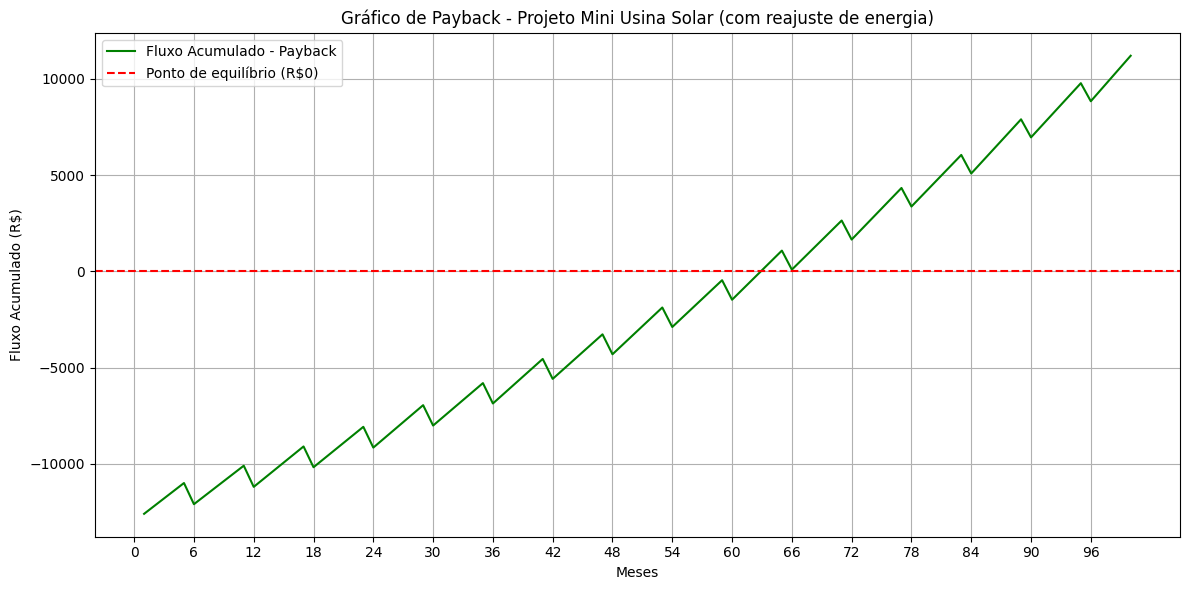

(None,
 np.float64(1384.5186482539793),
     Mês  Fluxo de Caixa          VP  Fluxo Acumulado  \
 62   63      510.512625  272.746972     13054.567875   
 
     Fluxo Acumulado com Investimento  
 62                         54.567875  )

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Parâmetros
investimento_inicial = 13000
economia_mensal_inicial = 400
reajuste_anual = 0.05  # 5% ao ano
manutencao_semestral = 1500
periodos = 100
taxa = 0.01

# Criar DataFrame com os fluxos de caixa ajustando economia ao longo do tempo com reajuste composto
fluxos = []
economia_mensal = economia_mensal_inicial
for mes in range(1, periodos + 1):
    if mes > 1 and mes % 12 == 1:  # Reajuste anual composto a cada 12 meses
        economia_mensal *= (1 + reajuste_anual)
    
    fluxo = economia_mensal
    if mes % 6 == 0:
        fluxo -= manutencao_semestral
    fluxos.append(fluxo)

df = pd.DataFrame({
    "Mês": range(1, periodos + 1),
    "Fluxo de Caixa": fluxos
})

# Calcular valor presente de cada fluxo
df["VP"] = df["Fluxo de Caixa"] / (1 + taxa) ** df["Mês"]

# Calcular VPL
VPL = df["VP"].sum() - investimento_inicial

# Calcular o fluxo acumulado (payback simples)
df["Fluxo Acumulado"] = df["Fluxo de Caixa"].cumsum()
df["Fluxo Acumulado com Investimento"] = df["Fluxo Acumulado"] - investimento_inicial

# Gráfico com marcações a cada 6 meses
plt.figure(figsize=(12, 6))
plt.plot(df["Mês"], df["Fluxo Acumulado com Investimento"], label="Fluxo Acumulado - Payback", color="green")
plt.axhline(0, color='red', linestyle='--', label="Ponto de equilíbrio (R$0)")
plt.title("Gráfico de Payback - Projeto Mini Usina Solar (com reajuste de energia)")
plt.xlabel("Meses")
plt.ylabel("Fluxo Acumulado (R$)")
plt.xticks(ticks=range(0, periodos + 1, 6))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show(), VPL, df[df["Fluxo Acumulado com Investimento"] > 0].head(1)  # Mostra o primeiro mês com payback positivo
